In [7]:
from PIL import Image
import numpy as np
from map_generator import MapGenerator
import matplotlib.pyplot as plt
import os

In [31]:
def get_resized_map(base_map, allowed_loss=0.1, resize_step=0.1):
    base_map = base_map.copy()
    if not (1/resize_step).is_integer():
        raise ValueError("resize_size %f if not proper" % resize_step)
    base_img = Image.fromarray(base_map)
    curr_img = base_img.copy()
    curr_resize = resize_step
    curr_loss = 1
    while curr_loss > allowed_loss:
        curr_width = round(base_img.size[0] * curr_resize)
        curr_height = round(base_img.size[1] * curr_resize)
        curr_img = base_img.resize((curr_width, curr_height), Image.Resampling.NEAREST)
        expanded_image = curr_img.resize(base_img.size, Image.Resampling.NEAREST)
        curr_map = np.array(expanded_image)
        mismatched_cells = np.sum(curr_map != base_map)
        total_cells = base_img.size[0] * base_img.size[1]
        curr_loss = mismatched_cells / total_cells
        curr_resize += resize_step
    return np.array(curr_img), curr_loss, curr_resize

In [3]:
map_details = {
    'map1': {
        'file_name': 'custom_map_2_params.yaml',
        'start': [100, 400],
        'end': [400, 100],
        'points': 2
    },
    'map2': {
        'file_name': 'custom_map_4_params.yaml',
        'start': [50, 250],
        'end': [250, 250],
        'points': 2
    },
    'map3': {
        'file_name': 'custom_map_3_params.yaml',
        'start': [50, 450],
        'end': [300, 100],
        'points': 4
    },
    'map4': {
        'file_name': 'custom_map_1_params.yaml',
        'start': [600, 800],
        'end': [1700, 500],
        'points': 4
    },
    'map5': {
        'file_name': 'map_012_params.yaml',
        'start': [250, 1750],
        'end': [1100, 200],
        'points': 5
    }
}

(2000, 2000)


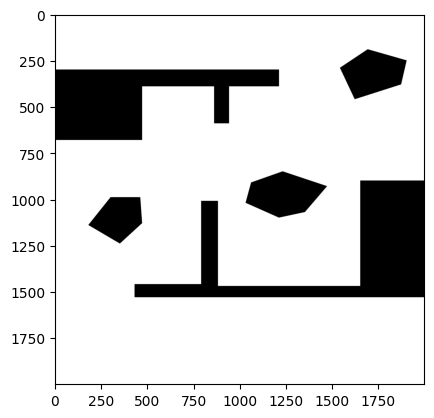

In [81]:
curr_details = map_details['map5']
map_gen = MapGenerator(os.path.join('map_params', curr_details['file_name']))
curr_map = map_gen.map.get_map()
start = np.array(curr_details['start']).astype(np.int32)
end = np.array(curr_details['end']).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
# plt.scatter([start[0]], [start[1]])
# plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [82]:
new_map, curr_loss, resize_factor = get_resized_map(curr_map, 0.05, 0.01)
curr_loss, resize_factor

(0.0306175, 0.03)

(40, 40)


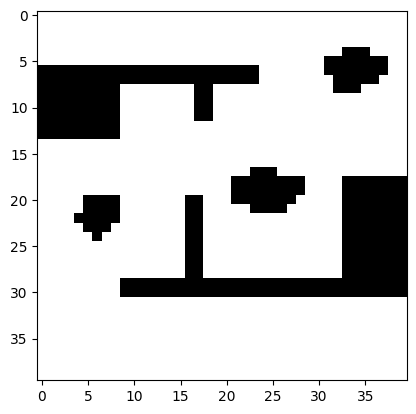

In [83]:
plt.imshow(new_map, cmap='gray')
print(new_map.shape)
plt.show()